In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv("train.csv")

Descrições das postagens

In [65]:
print(df["Description"])

0        Nibble is a 3+ month old ball of cuteness. He ...
1        I just found it alone yesterday near my apartm...
2        Their pregnant mother was dumped by her irresp...
3        Good guard dog, very alert, active, obedience ...
4        This handsome yet cute boy is up for adoption....
                               ...                        
14988    I have 4 kittens that need to be adopt urgentl...
14989    Serato(female cat- 3 color) is 4 years old and...
14990    Mix breed, good temperament kittens. Love huma...
14991    she is very shy..adventures and independent..s...
14992    Fili just loves laying around and also loves b...
Name: Description, Length: 14993, dtype: object


Carregamento de modelo Pré-treinado

In [66]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [67]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [68]:
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [73]:
def apply_score(phrase):
    tokens = tokenizer.encode(phrase, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [74]:
df = df.dropna()
df["Description"]

0        Nibble is a 3+ month old ball of cuteness. He ...
1        I just found it alone yesterday near my apartm...
2        Their pregnant mother was dumped by her irresp...
3        Good guard dog, very alert, active, obedience ...
4        This handsome yet cute boy is up for adoption....
                               ...                        
14987                                                ooooo
14989    Serato(female cat- 3 color) is 4 years old and...
14990    Mix breed, good temperament kittens. Love huma...
14991    she is very shy..adventures and independent..s...
14992    Fili just loves laying around and also loves b...
Name: Description, Length: 13724, dtype: object

In [75]:
df["Score"] = df["Description"].map(lambda x: apply_score(x[:511]))

In [76]:
df[['Score', 'Description']]

,Score,Description
0,4,Nibble is a 3+ month old ball of cuteness. He ...
1,2,I just found it alone yesterday near my apartm...
2,4,Their pregnant mother was dumped by her irresp...
3,4,"Good guard dog, very alert, active, obedience ..."
4,5,This handsome yet cute boy is up for adoption....
...,...,...
14987,1,ooooo
14989,3,Serato(female cat- 3 color) is 4 years old and...
14990,5,"Mix breed, good temperament kittens. Love huma..."
14991,4,she is very shy..adventures and independent..s...


In [84]:
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


<AxesSubplot:ylabel='Score'>

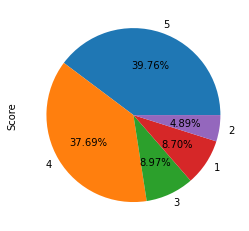

In [78]:
df["Score"].value_counts().plot(kind="pie", autopct='%1.2f%%' )

<AxesSubplot:xlabel='Score', ylabel='AdoptionSpeed'>

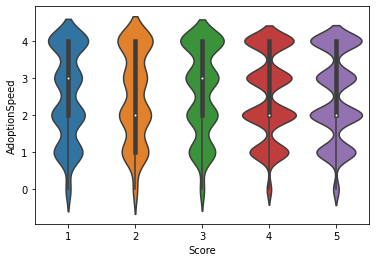

In [95]:
sns.violinplot(x=df["Score"], y=df["AdoptionSpeed"])

O Gráfico acima faz perceber que escores mais baixos tendem à ser mais uniformes tendo um aredondamento pro final, enquanto que em scores mais altos a Adoption Speed é menor, tendo uma adoção mais rápida logo no começo

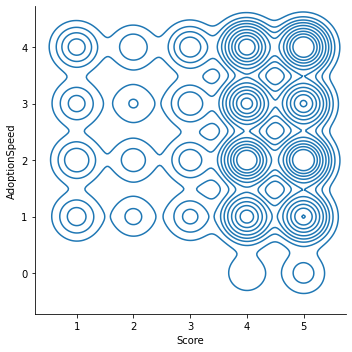

In [104]:
sns.displot(df, x="Score", y="AdoptionSpeed", kind="kde")

No gráfico heatmap acima é visto novamente a relação entre os scores e o Adoption Speed, confirmando a questão de que os scores mais positivos indicam uma linha mais uniforme na taxa de adoção

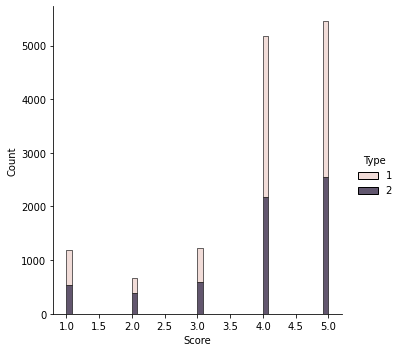

In [102]:
sns.displot(df, x="Score", hue="Type", multiple="stack")

O gráfico acima faz uma relação entre os scores mais positivos e o tipo de animal, se é cachorro ou gato.
Sendo 1 cachorro e 2 gato, é possível analisar que cachorros em geral tem mais scores altos que gatos, entretanto também possui mais scores baixos